In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import olac.maths as mf

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
arr1 = np.random.normal(0, 1, size=10000)

In [36]:
arr2 = np.random.normal(0.8, 1.3, size=10000)

KL divergence score: 0.3509814749301 

Hellinger distance: 0.2581753280791571 

Mutual information: 3.7909232828098944 



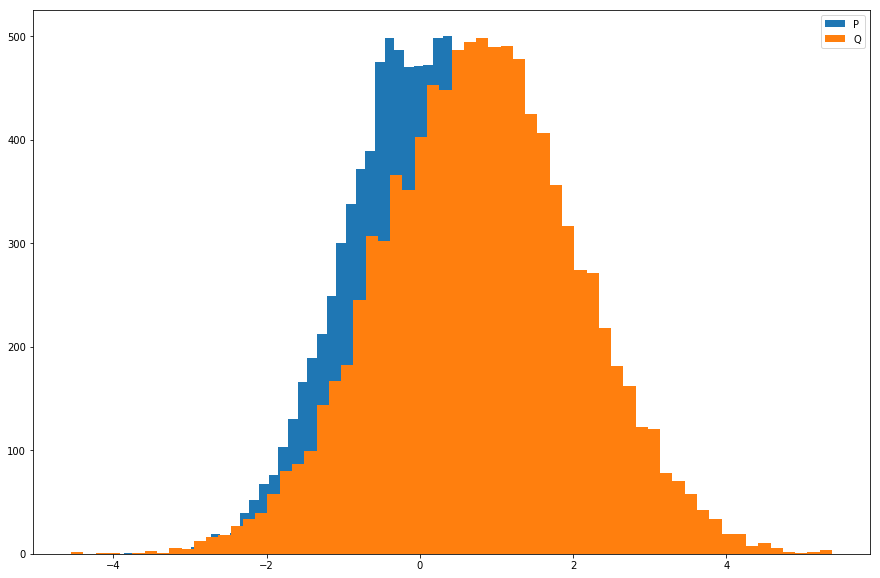

In [38]:
print('KL divergence score: {} \n'.format(mf.kl_div(arr1, arr2)))
print('Hellinger distance: {} \n'.format(mf.hellinger_dist(arr1, arr2)))
print('Mutual information: {} \n'.format(mf.mutual_info(arr1, arr2, normalized=3)))
plt.figure(figsize=(15, 10))
plt.hist(arr1, label='P', bins=mf.auto_bin(arr1));
plt.hist(arr2, label='Q', bins=mf.auto_bin(arr2));
plt.legend();

# MI with binning
Normalisation of the bin count does not appear to have an effect

In [39]:
arr1 = np.random.normal(0, 1, size=10000)
mu_sample = np.random.lognormal(0, 2, size=500)
kl = []
hd = []
mi = []
for mu in mu_sample:
    arr2 = np.random.normal(mu, 1, size=10000)
    kls = mf.kl_div(arr1, arr2)
    hds = mf.hellinger_dist(arr1, arr2)
    mis = mf.mutual_info(arr1, arr2, normalized=3)
    kl.append(kls)
    hd.append(hds)
    mi.append(mis)
    #print('mu: {}'.format(mu))
    #print('KL divergence score: {}'.format(kls))
    #print('Hellinger distance: {}'.format(hds))
    #print()

In [40]:
pd.Series(np.array(mi)).describe()

count    500.000000
mean       2.697836
std        1.367449
min        0.000000
25%        2.327423
50%        3.479491
75%        3.629189
max        3.744713
dtype: float64

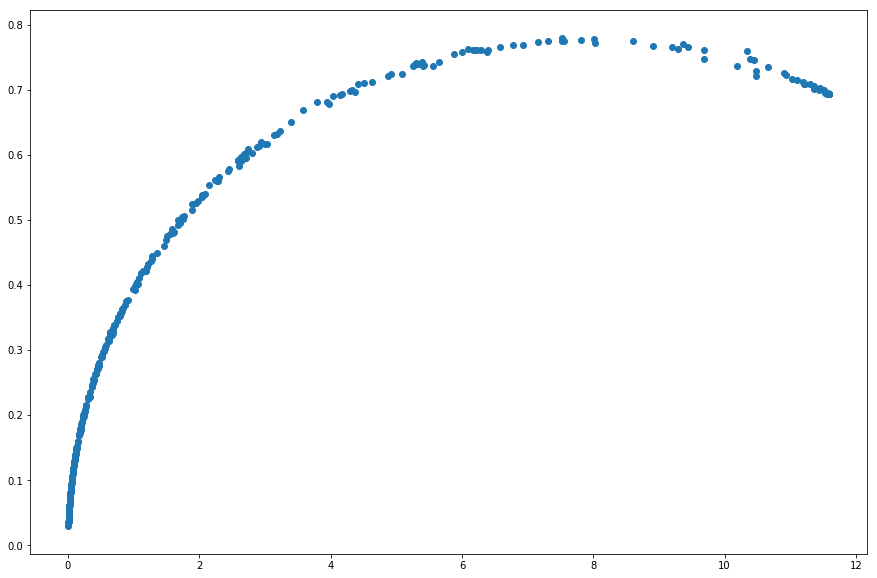

In [43]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(kl, hd)

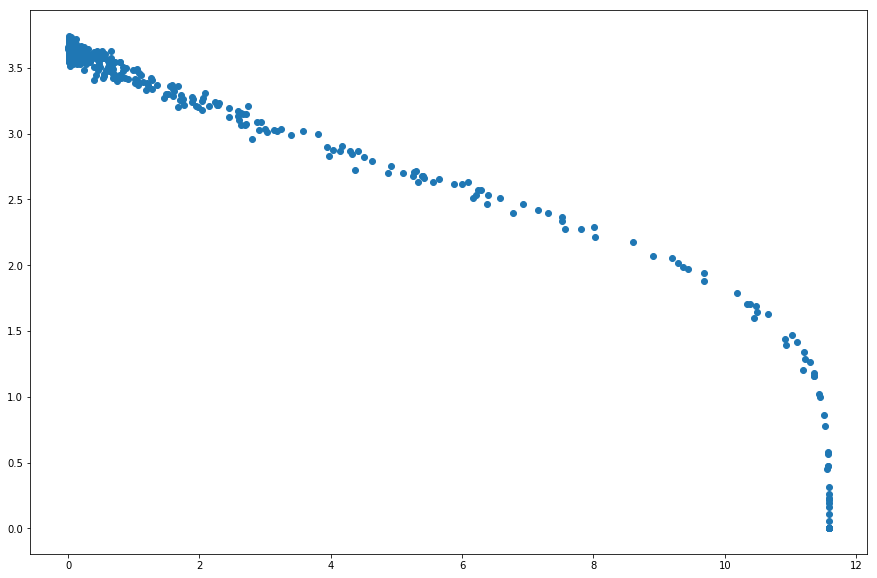

In [44]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(kl, mi)

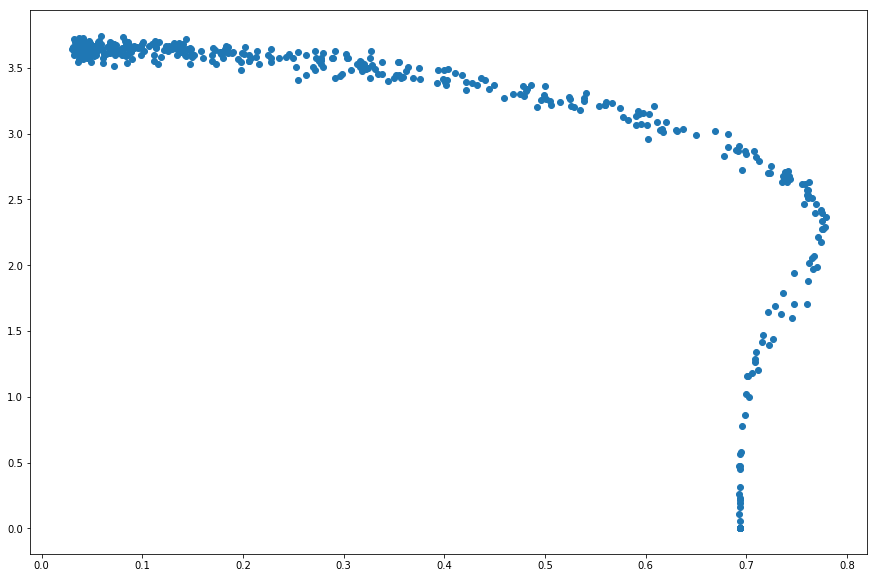

In [45]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(hd, mi)